In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split,LeaveOneOut,KFold,RepeatedStratifiedKFold
from sklearn.decomposition import PCA,TruncatedSVD,NMF
%matplotlib inline
import matplotlib
#matplotlib.use('agg')
matplotlib.style.use('ggplot')
import pickle as pkl
from matplotlib import pyplot as plt
from collections import Counter
from functools import reduce
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from sklearn.preprocessing import Normalizer

In [2]:
heads=pd.read_csv("/data/dharp/compounding/datasets/heads_reduced.csv",sep="\t")
heads=heads.query('decade != 2000')
heads=heads.reindex()
heads

,head,decade,context,count
0,a_n,1800,a_a,4
1,a_n,1810,a_a,20
2,a_n,1820,a_a,10
3,a_n,1830,a_a,14
4,a_n,1840,a_a,14
5,a_n,1850,a_a,34
6,a_n,1860,a_a,52
7,a_n,1870,a_a,14
8,a_n,1880,a_a,23
9,a_n,1890,a_a,30


In [3]:
modifiers=pd.read_csv("/data/dharp/compounding/datasets/modifiers_reduced.csv",sep="\t")
modifiers=modifiers.query('decade != 2000')
modifiers=modifiers.reindex()
modifiers

,modifier,decade,context,count
0,a_n,1830,a_n,1
1,a_n,1870,a_n,1
2,a_n,1880,a_n,3
3,a_n,1890,a_n,1
4,a_n,1900,a_n,1
5,a_n,1910,a_n,2
6,a_n,1920,a_n,15
7,a_n,1930,a_n,34
8,a_n,1940,a_n,13
9,a_n,1950,a_n,39


In [4]:
modifier_decade_counts=modifiers.groupby(['decade'])['count'].sum().to_frame()
modifier_decade_counts.columns=['N']
modifier_decade_counts

,N
decade,
1800,1875025
1810,3132730
1820,4925152
1830,7229042
1840,9705181
1850,15688004
1860,14102063
1870,17537155
1880,26200200


In [5]:
new_modifiers=modifiers.groupby(['modifier','context','decade'])['count'].sum().to_frame()
new_modifiers.columns=['a']
mod_star=modifiers.groupby(['modifier','decade'])['count'].sum().to_frame()
mod_star.columns=['mod_star']
context_star=modifiers.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_modifiers.reset_index(),mod_star.reset_index(),on=['modifier','decade'])
new_modifiers=pd.merge(merge1,context_star.reset_index(),on=['context','decade'])
new_modifiers=pd.merge(new_modifiers,modifier_decade_counts.reset_index(),on=["decade"])
new_modifiers['modifier_ppmi']=np.log2((new_modifiers['a']*new_modifiers['N'])/(new_modifiers['mod_star']*new_modifiers['context_star']**0.75))
new_modifiers.set_index(['modifier','decade'],inplace=True)
new_modifiers.drop(['a','mod_star','context_star','N'],axis=1,inplace=True)
new_modifiers.modifier_ppmi.loc[new_modifiers.modifier_ppmi<=0]=0
new_modifiers

,,context,modifier_ppmi
modifier,decade,,
a_n,1830,a_n,8.587
aa_n,1830,a_n,14.910
aaa_n,1830,a_n,15.618
american_n,1830,a_n,4.552
angle_n,1830,a_n,9.568
b_n,1830,a_n,10.906
british_n,1830,a_n,1.389
c_n,1830,a_n,9.367
capital_n,1830,a_n,1.643


In [6]:
head_decade_counts=heads.groupby(['decade'])['count'].sum().to_frame()
head_decade_counts.columns=['N']
head_decade_counts

,N
decade,
1800,2169414
1810,3624671
1820,5705766
1830,8349311
1840,11093500
1850,18032240
1860,16195725
1870,20093252
1880,30018992


In [11]:
new_heads=heads.groupby(['head','context','decade'])['count'].sum().to_frame()
new_heads.columns=['a']
head_star=heads.groupby(['head','decade'])['count'].sum().to_frame()
head_star.columns=['head_star']
context_star=heads.groupby(['context','decade'])['count'].sum().to_frame()
context_star.columns=['context_star']
merge1=pd.merge(new_heads.reset_index(),head_star.reset_index(),on=['head','decade'])
new_heads=pd.merge(merge1,context_star.reset_index(),on=['context','decade'])
new_heads=pd.merge(new_heads,head_decade_counts.reset_index(),on=["decade"])
new_heads['head_ppmi']=np.log2((new_heads['a']*new_heads['N'])/(new_heads['head_star']*new_heads['context_star']**0.75))
new_heads.set_index(['head','decade'],inplace=True)
new_heads.drop(['a','head_star','context_star','N'],axis=1,inplace=True)
new_heads.head_ppmi.loc[new_heads.head_ppmi<=0]=0
new_heads

,,context,head_ppmi
head,decade,,
a_n,1800,a_a,8.938
cat_n,1800,a_a,11.915
half_n,1800,a_a,12.497
khan_n,1800,a_a,7.948
mile_n,1800,a_a,11.781
story_n,1800,a_a,11.138
tale_n,1800,a_a,8.553
thomas_n,1800,a_a,4.174
tout_n,1800,a_a,17.085


In [12]:
new_heads.reset_index(inplace=True)
new_heads.columns=['constituent','decade','context','ppmi']
new_heads['constituent']=new_heads['constituent'].str.replace(r'_n$', r'_h', regex=True)
new_heads=new_heads.groupby(['constituent', 'decade','context'])['ppmi'].sum()

constituent    decade  context         
a_h            1800    a_a                 8.938
                       a_n                 9.081
                       aa_n               10.963
                       act_v               4.634
                       almost_r            5.055
                       angle_n             5.247
                       apart_r             7.546
                       b_n                10.157
                       be_v                2.509
                       becket_n           10.109
                       begin_v             6.335
                       bottom_n            6.066
                       breast_n            9.839
                       broach_n           10.902
                       c_n                 9.955
                       cause_v             5.647
                       circle_n            4.767
                       circumference_n     8.524
                       coincide_v          7.716
                       consid

In [13]:
new_modifiers.reset_index(inplace=True)
new_modifiers.columns=['constituent','decade','context','ppmi']
new_modifiers['constituent']=new_modifiers['constituent'].str.replace(r'_n$', r'_m', regex=True)
new_modifiers=new_modifiers.groupby(['constituent', 'decade','context'])['ppmi'].sum()
new_modifiers.shape

(23495976,)

In [14]:
constituents = pd.concat([new_heads,new_modifiers])
#constituents=constituents.groupby(['constituent', 'decade','context'])['ppmi'].sum()
constituents.shape

(51223824,)

In [15]:
constituents=constituents.to_sparse()

In [16]:
constituents, rows, _ = constituents.to_coo(row_levels=['constituent', 'decade'],column_levels=['context'],sort_labels=True)

In [17]:
co_occ_counts_svd = TruncatedSVD(n_components=300, n_iter=10, random_state=1991)
display(co_occ_counts_svd.fit(constituents).explained_variance_ratio_.sum())
co_occ_list=co_occ_counts_svd.fit(constituents).explained_variance_ratio_
co_occ_reduced = co_occ_counts_svd.fit_transform(constituents)
co_occ_reduced = Normalizer(copy=False).fit_transform(co_occ_reduced)
co_occ_reduced=pd.DataFrame(co_occ_reduced,index=rows)
co_occ_reduced

0.23701762021470957

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
"(a_h, 1800)",0.279,-0.093,-0.176,0.071,-0.023,0.053,-0.034,-0.107,-0.084,-0.169,...,0.022,0.015,0.057,0.020,-0.008,-0.016,0.007,0.017,-0.044,0.009
"(a_h, 1810)",0.315,-0.133,-0.181,0.061,-0.009,0.053,-0.038,-0.139,-0.100,-0.161,...,0.010,0.010,0.044,-0.004,0.008,-0.030,0.010,0.024,-0.028,-0.013
"(a_h, 1820)",0.337,-0.112,-0.203,0.094,-0.004,0.042,-0.035,-0.125,-0.095,-0.160,...,0.028,0.019,0.056,0.022,-0.002,-0.009,0.023,0.026,-0.026,0.000
"(a_h, 1830)",0.398,-0.127,-0.189,0.085,0.021,0.024,-0.046,-0.154,-0.111,-0.185,...,0.006,0.068,0.004,0.012,0.016,-0.061,0.009,0.047,-0.002,-0.041
"(a_h, 1840)",0.425,-0.190,-0.200,0.050,0.018,0.069,-0.023,-0.152,-0.110,-0.218,...,0.009,0.045,0.022,-0.006,0.006,-0.032,0.025,0.010,-0.025,-0.009
"(a_h, 1850)",0.448,-0.189,-0.187,0.029,0.031,0.051,-0.020,-0.160,-0.134,-0.206,...,0.007,0.044,0.036,-0.005,0.003,-0.042,0.010,-0.010,0.010,-0.028
"(a_h, 1860)",0.460,-0.172,-0.170,0.043,0.005,0.054,-0.038,-0.182,-0.099,-0.203,...,-0.003,0.067,0.047,0.013,0.006,-0.048,0.026,0.011,-0.006,-0.002
"(a_h, 1870)",0.497,-0.182,-0.164,0.044,0.043,0.053,-0.019,-0.181,-0.117,-0.238,...,-0.008,0.036,0.033,-0.015,0.002,-0.045,-0.022,-0.017,0.013,0.008
"(a_h, 1880)",0.524,-0.187,-0.148,0.013,0.040,0.022,-0.030,-0.197,-0.119,-0.209,...,-0.009,0.035,0.031,-0.009,-0.013,-0.047,-0.007,-0.017,-0.005,0.008
"(a_h, 1890)",0.560,-0.176,-0.139,0.029,0.049,0.037,-0.037,-0.166,-0.084,-0.170,...,0.013,0.039,0.047,-0.010,-0.008,-0.037,0.019,-0.012,-0.001,-0.010


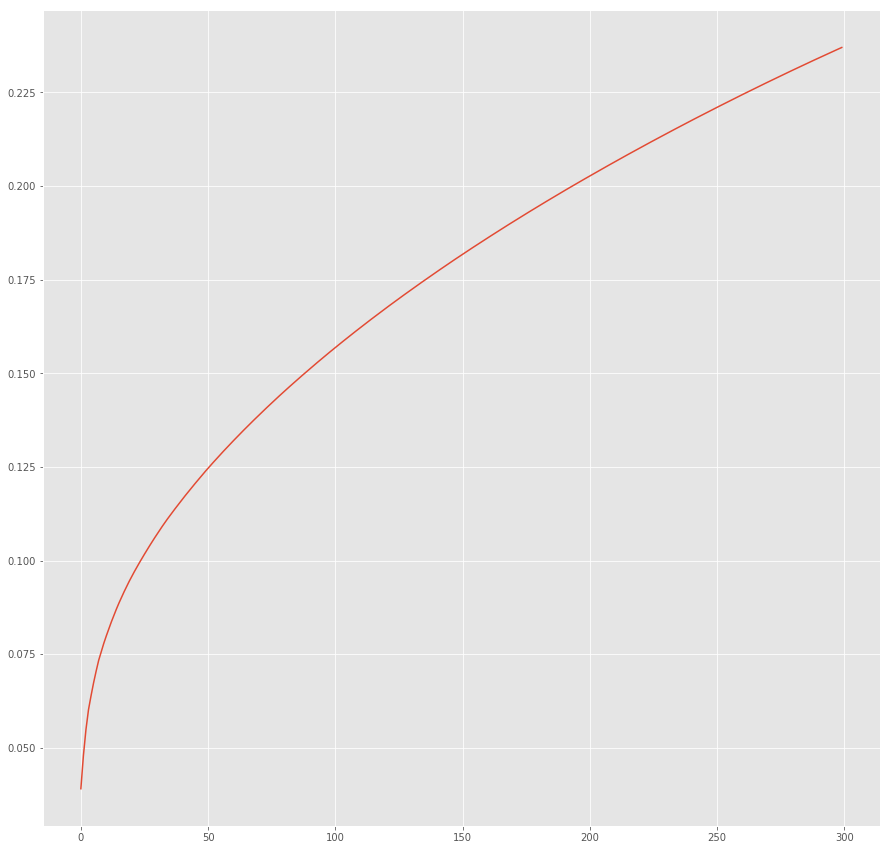

In [18]:
pd.Series(co_occ_list).cumsum().plot(figsize=[15,15])